In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
Title           7797 non-null object
Author          7797 non-null object
Edition         7797 non-null object
Reviews         7797 non-null float64
Ratings         7797 non-null int64
Synopsis        7797 non-null object
Genre           7797 non-null object
BookCategory    7797 non-null object
Price           6237 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 548.3+ KB


In [4]:
df.describe()

,Reviews,Ratings,Price
count,7797.000000,7797.000000,6237.000000
mean,4.295845,35.520841,560.707516
std,0.663513,153.020897,690.110657
min,1.000000,1.000000,25.000000
25%,4.000000,2.000000,249.180000
50%,4.400000,6.000000,373.000000
75%,4.800000,21.000000,599.000000
max,5.000000,6090.000000,14100.000000


In [5]:
df.nunique()

Title           6787
Author          4372
Edition         3882
Reviews           36
Ratings          368
Synopsis        6771
Genre            363
BookCategory      11
Price           1614
dtype: int64

In [7]:
df["BookCategory"].unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [8]:
def cat(cat): 
    if cat == 'Action & Adventure':
        return 1
    elif cat == 'Biographies, Diaries & True Accounts':
        return 2
    elif cat == 'Humour':
        return 3
    elif cat == 'Crime, Thriller & Mystery':
        return 4
    elif cat == 'Arts, Film & Photography':
        return 5
    elif cat == 'Sports':
        return 6
    elif cat == 'Language, Linguistics & Writing':
        return 7
    elif cat == 'Computing, Internet & Digital Media':
        return 8
    elif cat == 'Romance':
        return 9
    elif cat == 'Comics & Mangas':
        return 10
    else:
        return 11
df['BookCategory'] = df['BookCategory'].apply(cat)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
Title           7797 non-null object
Author          7797 non-null object
Edition         7797 non-null object
Reviews         7797 non-null float64
Ratings         7797 non-null int64
Synopsis        7797 non-null object
Genre           7797 non-null object
BookCategory    7797 non-null int64
Price           6237 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 548.3+ KB


In [11]:
df.describe()

,Reviews,Ratings,BookCategory,Price
count,7797.000000,7797.000000,7797.000000,6237.000000
mean,4.295845,35.520841,5.565089,560.707516
std,0.663513,153.020897,3.161349,690.110657
min,1.000000,1.000000,1.000000,25.000000
25%,4.000000,2.000000,3.000000,249.180000
50%,4.400000,6.000000,5.000000,373.000000
75%,4.800000,21.000000,8.000000,599.000000
max,5.000000,6090.000000,11.000000,14100.000000


In [14]:
train = df.iloc[:6237]

In [15]:
test = df.iloc[6237:]

In [22]:
test = test.drop("Price",axis=1)

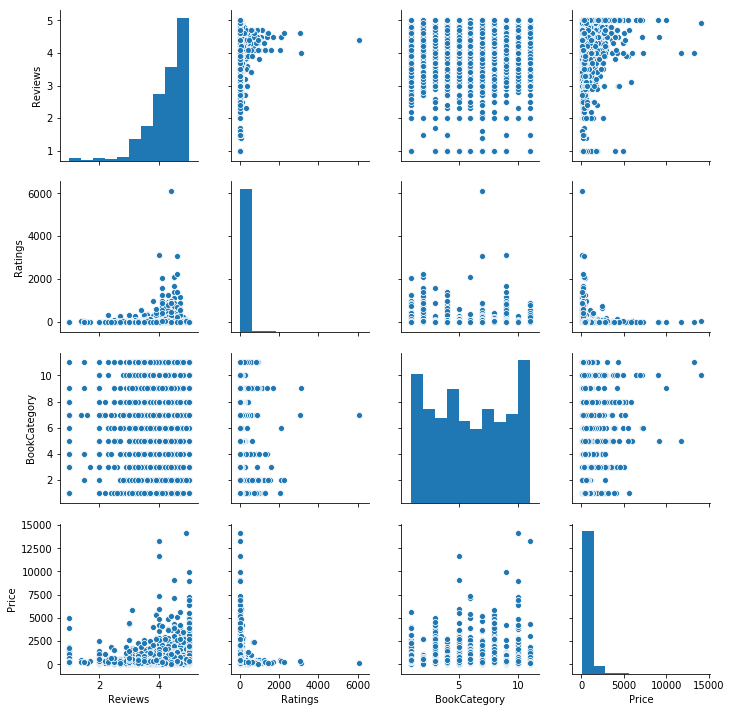

In [25]:
sns.pairplot(train)

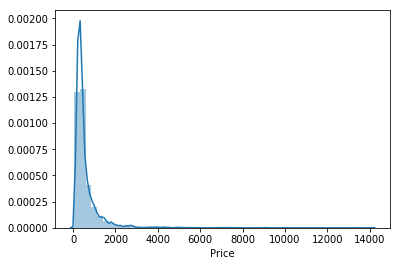

In [26]:
sns.distplot(train["Price"])

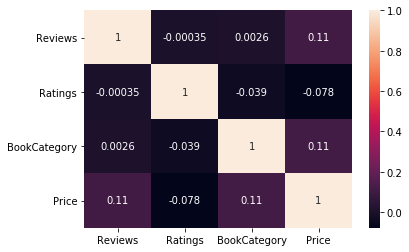

In [41]:
sns.heatmap(train.corr(),annot=True)

In [28]:
X = train[['Reviews', 'Ratings', 'BookCategory']]
y = train['Price']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
predictions = lm.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 358.1398127770026
MSE: 571644.5373510721
RMSE: 756.0717805546456


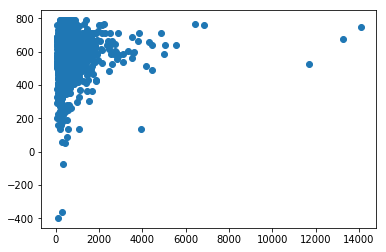

In [37]:
plt.scatter(y_test,predictions)

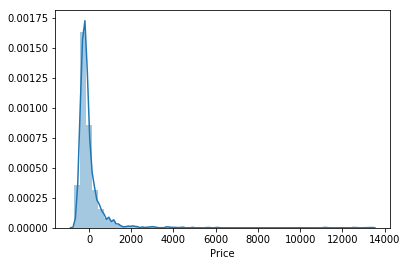

In [38]:
sns.distplot((y_test-predictions),bins=50);

In [44]:
test = test[["Reviews","Ratings","BookCategory"]]

In [45]:
predic = lm.predict(test)

In [50]:
test["Price"]=predic

In [52]:
test["Price"].to_csv("Price.csv")